In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [2]:
df = pd.read_csv('arsenic.csv')
df.shape

(765, 11)

In [3]:
df.tail()

,Latitude,Longitude,As,Aridity Index,Slope,Evapotranspiration,Nitrogen,OCD,Precipitation,Silt,TAS
760,36.279167,72.512500,1,1195,2293,1497,263.0,259.0,29821,378.0,2770
761,36.295833,72.312500,0,1178,2320,1550,229.0,231.0,26770,359.0,2766
762,36.295833,74.620833,1,985,2141,1456,385.0,278.0,35951,386.0,2754
763,36.312500,74.862500,0,1107,2643,1322,388.0,271.0,51497,393.0,2715
764,36.345833,73.320833,0,1745,3474,1245,313.0,330.0,56120,424.0,2709


In [4]:
X = df.drop(columns=['As', 'Latitude', 'Longitude'])
y = df['As']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7908496732026143
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        75
           1       0.79      0.81      0.80        78

    accuracy                           0.79       153
   macro avg       0.79      0.79      0.79       153
weighted avg       0.79      0.79      0.79       153



In [10]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]



y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


auc = roc_auc_score(y_test, y_proba)


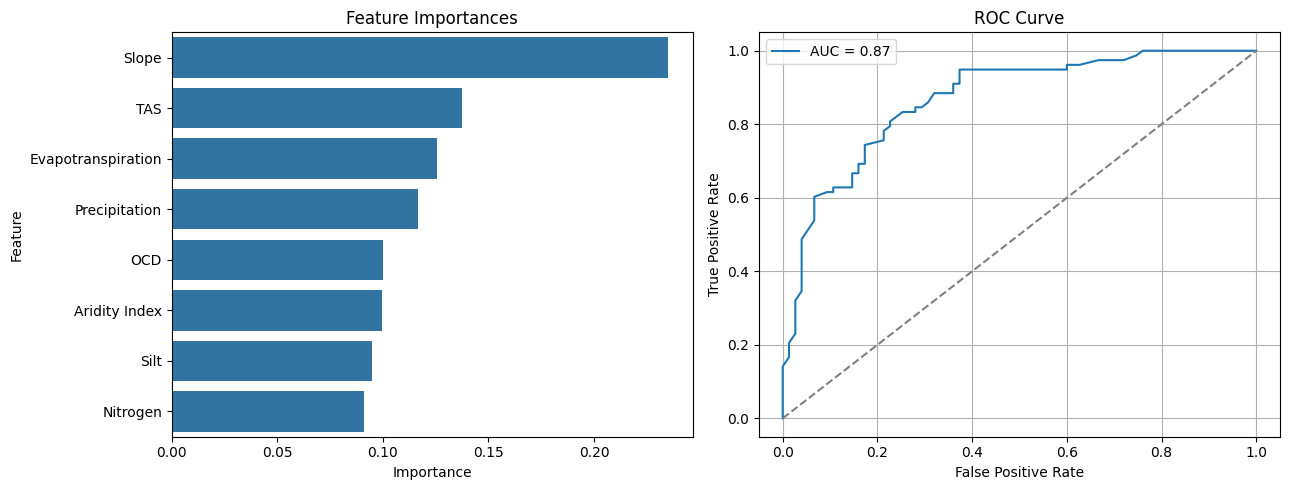

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))

sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], ax=ax[0])
ax[0].set_title("Feature Importances")
ax[0].set_xlabel("Importance")
ax[0].set_ylabel("Feature")

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].set_title("ROC Curve")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']